<div style="text-align: center; max-width: 700px; margin: 20px auto; padding: 25px; 
            border: 2px solid #346751; 
            border-radius: 10px; 
            font-family: Georgia, 'Times New Roman', serif; 
            background-color: #f9fbf9;">
  <h1 style="font-size: 26px; color: #1a365d; margin: 0; font-weight: normal; letter-spacing: 0.8px;">
    Statistiques exploratoires spatiales (avec Python)
  </h1>
  <h3 style="font-size: 19px; color: #2d5e8a; margin: 14px 0 8px; font-weight: normal; font-style: italic;">
    TP1 : Importation et Visualisation de données
  </h3>
      <h3 style="font-size: 19px; color: #2d5e8a; margin: 14px 0 8px; font-weight: normal; font-style: italic;">
    Réalisé par Mouhamet SECK
  </h3>
  <p style="color: #555; font-size: 15px; margin: 0; letter-spacing: 0.5px;">
    ENSAE 2025 – ISE1 CL
  </p>
</div>

## <span style="font-weight:600; color:#1a5fb4;">1. Import des bibliothèques</span>

Dans cette première étape, nous importons l’ensemble des bibliothèques nécessaires au traitement et à la visualisation des
données spatiales. Chaque module joue un rôle spécifique :

- os : permet de gérer les chemins d’accès aux fichiers et de parcourir les répertoires du projet.

- re : fournit des outils d’expressions régulières, utilisés ici pour extraire automatiquement les années à partir

  des noms de fichiers.

- geopandas : bibliothèque essentielle pour la manipulation des données vectorielles (shapefiles). Elle permet de lire,

  analyser et visualiser les limites administratives du Nigéria.

- rasterio : spécialisée dans la lecture et le traitement des données raster (GeoTIFF). Elle offre un accès efficace aux

  métadonnées, aux bandes raster et aux transformations spatiales.

- numpy : utilisé pour le traitement numérique des matrices raster (remplacement des NoData, calculs statistiques, moyennes, masquage, etc.).

- matplotlib.pyplot : sert à produire les visualisations (cartes thématiques, comparaisons spatiales, courbes temporelles, etc.).

L’ensemble de ces bibliothèques constitue une base solide pour réaliser un workflow complet de traitement géospatial sur Python : lecture, exploration, manipulation et visualisation des données spatiales.

In [164]:
import os
import re

import geopandas as gpd
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt


## <span style="font-weight:600; color:#1a5fb4;">2. Chargement et inspection des limites administratives (GADM)</span>

## <span style="font-weight: 600; color: #2d5e8a;">2.1. Lecture des shapefiles</span>

gpd.read_file() permet de charger directement un fichier vectoriel (shapefile, GeoJSON, etc.) sous forme de GeoDataFrame. Cette fonction lit 
la géométrie et les attributs associés, ce qui permet ensuite d’explorer, manipuler et visualiser les limites administratives du pays.

In [167]:
gadm_dir = "data/gadm"

gadm0_path = os.path.join(gadm_dir, "gadm41_BEN_0.shp")
gadm1_path = os.path.join(gadm_dir, "gadm41_NBEN_1.shp")
gadm2_path = os.path.join(gadm_dir, "gadm41_BEN_2.shp")

ben0 = gpd.read_file("data/gadm/gadm41_BEN_0.shp")  # pays
ben1 = gpd.read_file("data/gadm/gadm41_BEN_1.shp")  # États
ben2 = gpd.read_file("data/gadm/gadm41_BEN_2.shp")  # LGA ou équivalent


## <span style="font-weight: 600; color: #2d5e8a;">2.2. Affichage des propriétés principales</span>

L’affichage des propriétés d’un shapefile permet de comprendre sa structure : type de géométrie, nombre d'entités, système de coordonnées (CRS), 
emprise spatiale (bounds) et attributs disponibles. Cette étape est essentielle pour vérifier la cohérence des données avant toute analyse ou 
visualisation.

In [168]:
# Ici nous affichons les propriétés du gadm de niveau 2 

In [169]:
ben2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_2      78 non-null     object  
 1   GID_0      78 non-null     object  
 2   COUNTRY    78 non-null     object  
 3   GID_1      78 non-null     object  
 4   NAME_1     78 non-null     object  
 5   NL_NAME_1  78 non-null     object  
 6   NAME_2     78 non-null     object  
 7   VARNAME_2  78 non-null     object  
 8   NL_NAME_2  78 non-null     object  
 9   TYPE_2     78 non-null     object  
 10  ENGTYPE_2  78 non-null     object  
 11  CC_2       78 non-null     object  
 12  HASC_2     78 non-null     object  
 13  geometry   78 non-null     geometry
dtypes: geometry(1), object(13)
memory usage: 8.7+ KB


In [171]:
print("CRS:", ben2.crs)

CRS: EPSG:4326


In [172]:
ben2.total_bounds

array([ 0.774345  ,  6.2349095 ,  3.85170102, 12.41835117])

In [175]:
ben2.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,BEN.1.1_1,BEN,Benin,BEN.1_1,Alibori,NA,Banikoara,NA,NA,Commune,Commune,NA,BJ.AL.BA,"POLYGON ((2.80292 11.41028, 2.80624 11.4102, 2..."
1,BEN.1.2_1,BEN,Benin,BEN.1_1,Alibori,NA,Gogounou,NA,NA,Commune,Commune,NA,BJ.AL.GO,"POLYGON ((2.78159 10.91505, 2.78333 10.91593, ..."
2,BEN.1.3_1,BEN,Benin,BEN.1_1,Alibori,NA,Kandi,NA,NA,Commune,Commune,NA,BJ.AL.KN,"POLYGON ((3.19599 10.90738, 3.19439 10.90462, ..."
3,BEN.1.4_1,BEN,Benin,BEN.1_1,Alibori,NA,Karimama,NA,NA,Commune,Commune,NA,BJ.AL.KR,"POLYGON ((3.25276 12.00027, 3.24857 11.99418, ..."
4,BEN.1.5_1,BEN,Benin,BEN.1_1,Alibori,NA,Malanville,NA,NA,Commune,Commune,NA,BJ.AL.MA,"POLYGON ((3.58278 11.71444, 3.58833 11.71083, ..."


## <span style="font-weight: 600; color: #2d5e8a;">2.3. Visualisation des limites</span>

In [270]:
# Ici on visualise les diviions administratives de niveau 1

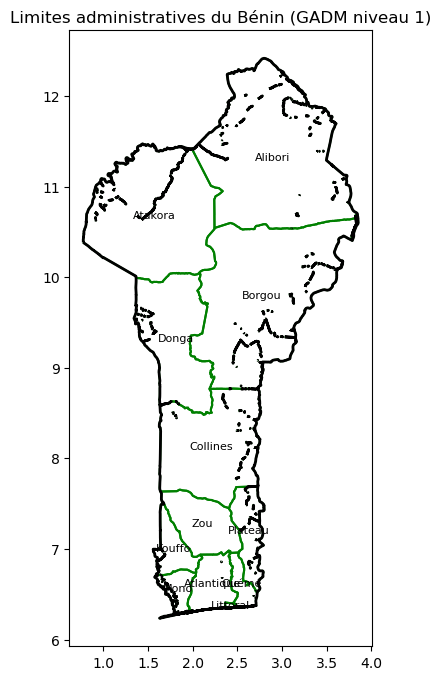

In [262]:
fig, ax = plt.subplots(figsize=(8, 8))
ben1.boundary.plot(ax=ax, linewidth=1.5, color="green")
ben0.boundary.plot(ax=ax, linewidth=2, color="black")

# Ajout des noms au centroïde
for idx, row in ben1.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["NAME_1"], fontsize=8, color="black", ha='center', va='center')

ax.set_title("Limites administratives du Bénin (GADM niveau 1)")
plt.savefig("outputs/Limites_administratives_benin.png", dpi=300, bbox_inches='tight')
plt.show()

## <span style="font-weight:600; color:#1a5fb4;">3. Chargement et inspection du raster WorldPop 2024</span>

## <span style="font-weight: 600; color: #2d5e8a;">3.1. Lecture du raster</span>

L’ouverture d’un fichier raster avec rasterio.open() permet d’accéder à ses propriétés essentielles : dimensions (lignes/colonnes), nombre de bandes, système de coordonnées (CRS), résolution spatiale, emprise géographique et type de données. Cette étape est indispensable pour comprendre la structure du raster et vérifier sa compatibilité avec les données vectorielles utilisées.

In [178]:
worldpop_path = "data/worldpop/ben_pop_2024_CN_100m_R2025A_v1.tif"

wp_src = rasterio.open(worldpop_path)
print(wp_src)

<open DatasetReader name='data/worldpop/ben_pop_2024_CN_100m_R2025A_v1.tif' mode='r'>


## <span style="font-weight: 600; color: #2d5e8a;">3.2. Affichage des propriétés demandées</span>

In [179]:
print("- WORLDPOP 2024")
print("CRS:", wp_src.crs)
print("Dimensions (width x height):", wp_src.width, "x", wp_src.height)
print("Nombre de bandes:", wp_src.count)
print("Résolution (taille des pixels en degré décimal) :", wp_src.res)
print("Transform :", wp_src.transform)
print("Emprise (bounds) :", wp_src.bounds)


- WORLDPOP 2024
CRS: EPSG:4326
Dimensions (width x height): 3680 x 7408
Nombre de bandes: 1
Résolution (taille des pixels en degré décimal) : (0.00083333333, 0.00083333333)
Transform : | 0.00, 0.00, 0.78|
| 0.00,-0.00, 12.41|
| 0.00, 0.00, 1.00|
Emprise (bounds) : BoundingBox(left=0.7758326102299973, bottom=6.235000311059984, right=3.842499264629997, top=12.408333619699984)


## <span style="font-weight: 600; color: #2d5e8a;">3.3. Visualisation de la population 2024</span>

In [271]:
# Ici on visualise la densité de la population en 2024

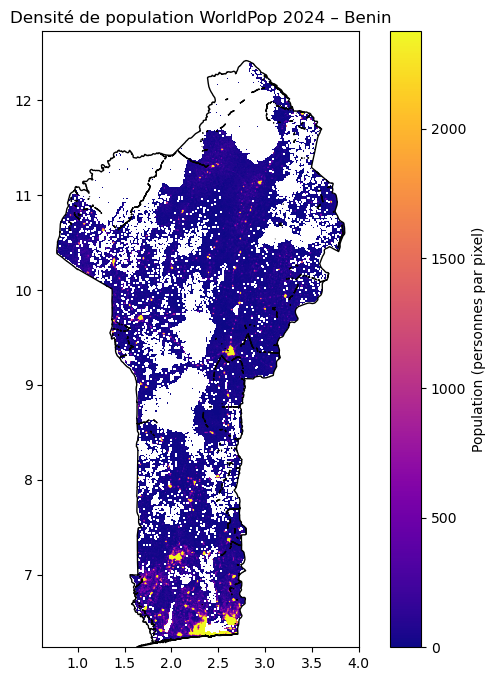

In [264]:
# Charger

with rasterio.open("data/worldpop/ben_pop_2024_CN_1km_R2025A_UA_v1.tif") as wp_src:
    wp_data = wp_src.read(1).astype(float)
    wp_data[wp_data == wp_src.nodata] = np.nan
    bounds = wp_src.bounds

# Calculer les percentiles pour éviter les outliers
vmin, vmax = np.nanpercentile(wp_data, [1, 99])

# Visualisation
fig, ax = plt.subplots(figsize=(8, 8))
img = ax.imshow(
    wp_data,
    extent=(bounds.left, bounds.right, bounds.bottom, bounds.top),
    origin="upper",
    cmap="plasma",
    vmin=vmin,
    vmax=vmax
)
ben0.boundary.plot(ax=ax, linewidth=1, edgecolor="black")
ax.set_title("Densité de population WorldPop 2024 – Benin")
plt.colorbar(img, ax=ax, label="Population (personnes par pixel)")
plt.savefig("outputs/densité_pop_2024_benin.png", dpi=300, bbox_inches='tight')
plt.show()

La densité de population est fortement concentrée au Sud, notamment autour de Cotonou, Porto-Novo et Abomey-Calavi, où les valeurs par pixel dépassent largement le reste du pays. Le centre présente une densité modérée et plus diffuse. Le Nord est globalement faiblement peuplé, avec de vastes zones quasi vides. Cette distribution traduit la forte urbanisation côtière et la concentration des activités économiques au Sud. Ces contrastes spatiaux influencent directement les besoins sanitaires et la vulnérabilité face aux épidémies.

## <span style="font-weight:600; color:#1a5fb4;">4. Chargement et inspection d’un raster Malaria (une année)</span>

In [214]:
# Année = 2024
mal_dir = r"C:/Users/HP/Desktop/ISE1 CL/Semestre1/Statistiques Exploratoires Spatiales/TP/TP_individuels/TP1/malaria"

gadm0_path = os.path.join(mal_dir, "202508_Global_Pf_Parasite_Rate_BEN_2024.tif")

# mal2024_path = mal_dir / "202508_Global_Pf_Mortality_Rate_NGA_2024.tiff"

mal_src = rasterio.open("data/malaria/202508_Global_Pf_Parasite_Rate_BEN_2024.tiff")

print("- MALARIA 2024")
print("CRS:", mal_src.crs)
print("Dimensions:", mal_src.width, "x", mal_src.height)
print("Nombre de bandes:", mal_src.count)
print("Résolution :", mal_src.res)
print("Transform :", mal_src.transform)
print("Emprise :", mal_src.bounds)


- MALARIA 2024
CRS: EPSG:4326
Dimensions: 73 x 148
Nombre de bandes: 4
Résolution : (0.041666668869465705, 0.04165069164673973)
Transform : | 0.04, 0.00, 0.79|
| 0.00,-0.04, 12.39|
| 0.00, 0.00, 1.00|
Emprise : BoundingBox(left=0.7916729666719302, bottom=6.226482227536077, right=3.8333397941429266, top=12.390784591253556)


### Visualisation de la mortalité palustre 2024

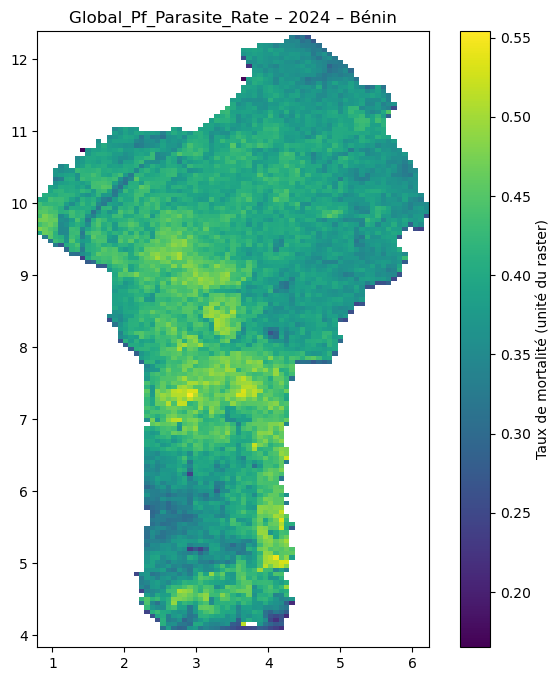

In [265]:
mal_2024 = mal_src.read(1)
mal_2024 = np.where(mal_2024 == mal_src.nodata, np.nan, mal_2024)

fig, ax = plt.subplots(figsize=(8, 8))
img = ax.imshow(
    mal_2024,
    extent=mal_src.bounds,
    origin="upper"
)

ax.set_title("Global_Pf_Parasite_Rate – 2024 – Bénin")
plt.colorbar(img, ax=ax, label="Taux de mortalité (unité du raster)")
plt.savefig("outputs/Global_Pf_Parasite_Rate_2024_benin.png", dpi=300, bbox_inches='tight')
plt.show()


En 2024, la prévalence reste modérée à élevée dans le Nord du Bénin, où les zones de transmission historique persistent. Le Sud présente des valeurs plus faibles, en cohérence avec une meilleure urbanisation et un accès accru aux services de santé. Quelques foyers localisés subsistent toutefois dans le centre du pays. La carte montre un gradient nord-sud très marqué. La situation globale s’améliore, mais nécessite encore un ciblage géographique des interventions.

## <span style="font-weight:600; color:#1a5fb4;">5. Application 1 – Comparaison spatiale Population vs Malaria en 2024</span>

In [76]:
# Objectif : montrer sur deux cartes la population et la mortalité palustre pour la même année.

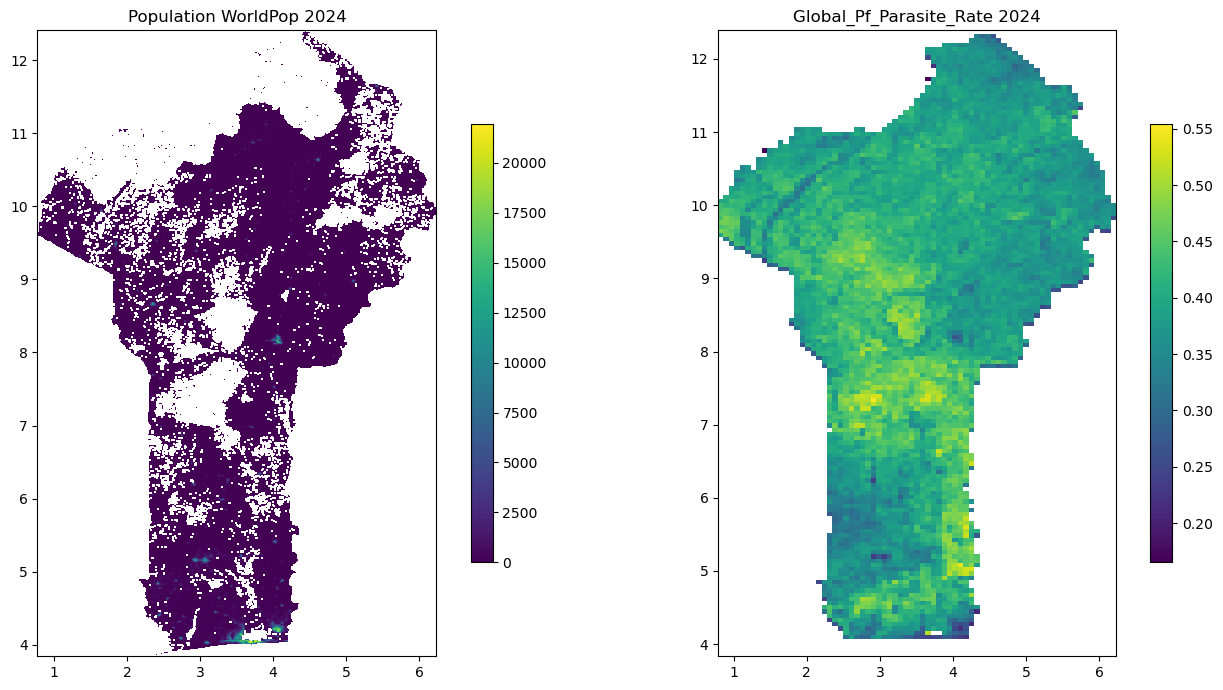

In [266]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Population
img1 = axes[0].imshow(
    wp_data,
    extent=wp_src.bounds,
    origin="upper"
)

axes[0].set_title("Population WorldPop 2024")
plt.colorbar(img1, ax=axes[0], shrink=0.7)

# Malaria
img2 = axes[1].imshow(
    mal_2024,
    extent=mal_src.bounds,
    origin="upper"
)

axes[1].set_title("Global_Pf_Parasite_Rate 2024")
plt.colorbar(img2, ax=axes[1], shrink=0.7)

plt.tight_layout()
plt.savefig("outputs/Situation_Global_Pf_Parasite_Rate_pop_2024_benin.png", dpi=300, bbox_inches='tight')
plt.show()


La carte met en évidence que les zones les plus peuplées (notamment la côte sud) ne sont pas celles présentant les taux de prévalence les plus élevés. Au contraire, la transmission malaria reste plus forte dans les zones rurales du Nord, malgré une densité de population plus faible. Cela suggère que la vulnérabilité est davantage liée aux conditions environnementales et socio-sanitaires qu'à la densité humaine. Les zones denses nécessitent surtout du contrôle préventif, tandis que les zones rurales demandent des efforts ciblés de prise en charge. Cette dissociation est un élément clé pour les politiques de santé publique.

## <span style="font-weight:600; color:#1a5fb4;">6. Application 2 – Évolution temporelle du Global_Pf_Parasite_Rate_BEN (2000–2024)</span>

In [272]:
# Ici on fait l'analyse de l'évolution du Global_Pf_Parasite_Rate_BEN de 2000 à 2024

## <span style="font-weight: 600; color: #2d5e8a;">6.1. Lister les fichiers et extraire l’année</span>

In [250]:
mal_dir = r"C:/Users/HP/Desktop/ISE1 CL/Semestre1/Statistiques Exploratoires Spatiales/TP/TP_individuels/TP1/data/malaria"

malaria_files = sorted(
    [f for f in os.listdir(mal_dir) if f.endswith(".tiff")]
)

years = []
mean_values = []

pattern = r"(\d{4})\.tiff$"  # récupère l'année à la fin du nom


In [251]:
malaria_files

['202508_Global_Pf_Parasite_Rate_BEN_2000.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2001.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2002.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2003.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2004.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2005.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2006.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2007.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2008.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2009.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2010.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2011.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2012.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2013.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2014.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2015.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2016.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2017.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2018.tiff',
 '202508_Global_Pf_Parasite_Rate_BEN_2019.tiff',
 '202508_Global_Pf_P

## <span style="font-weight: 600; color: #2d5e8a;">6.2. Boucle sur les fichiers</span>

In [254]:
for fname in malaria_files:
    match = re.search(pattern, fname)
    if not match:
        continue  # au cas où un fichier n'a pas l'année
    
    year = int(match.group(1))

    path = os.path.join(mal_dir, fname)
    with rasterio.open(path) as src:
        data = src.read(1).astype(float)
        data = np.where(data == src.nodata, np.nan, data)
        mean_val = np.nanmean(data)

years = np.array(years)
mean_values = np.array(mean_values)


In [255]:
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [256]:
mean_values 

array([0.34731091, 0.40862172, 0.47004596, 0.51942889, 0.58736639,
       0.65691356, 0.67751313, 0.66660631, 0.59855959, 0.54320782,
       0.50057986, 0.44842025, 0.41642466, 0.40986104, 0.42021148,
       0.44501419, 0.47249741, 0.4565774 , 0.43130905, 0.41849114,
       0.37817572, 0.37466553, 0.38847344, 0.39495012, 0.39889232])

## <span style="font-weight: 600; color: #2d5e8a;">6.3. Courbe de tendance</span>

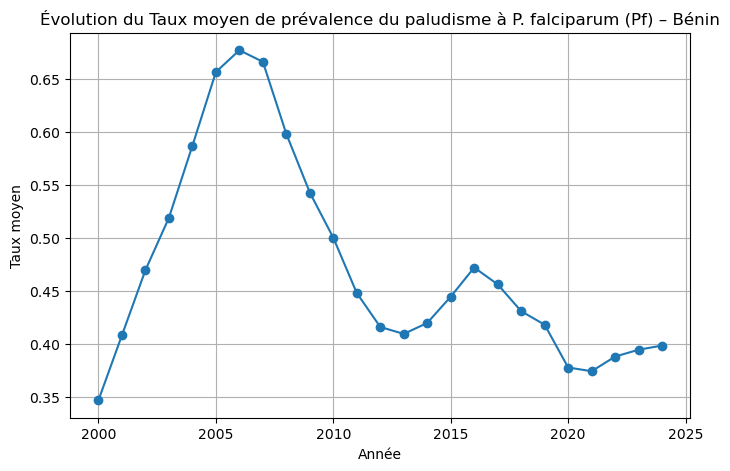

In [268]:
order = np.argsort(years)
years_sorted = years[order]
mean_sorted = mean_values[order]

plt.figure(figsize=(8, 5))
plt.plot(years_sorted, mean_sorted, marker="o")
plt.title("Évolution du Taux moyen de prévalence du paludisme à P. falciparum (Pf) – Bénin")
plt.xlabel("Année")
plt.ylabel("Taux moyen")
plt.grid(True)
plt.savefig("outputs/Evolution_Taux_moyen_de_prévalence_du_paludisme_P._falciparum_(Pf)_benin.png", dpi=300, bbox_inches='tight')
plt.show()


Le taux moyen de prévalence augmente nettement entre 2000 et 2006, atteignant un pic autour de 0,67. À partir de 2007, une baisse progressive s’amorce jusqu’en 2012, probablement due à l’intensification des mesures de prévention (moustiquaires, traitements). La période 2013–2017 montre une légère reprise suivie d’un nouveau recul après 2018. Les années récentes se stabilisent autour de 0,38–0,40. Globalement, malgré des fluctuations, la tendance long terme est à la baisse.

## <span style="font-weight:600; color:#1a5fb4;">7. (Option) Visualisation comparée de 3 années clés</span>

In [78]:
# on prend les années 2000, 2012 et 2024.

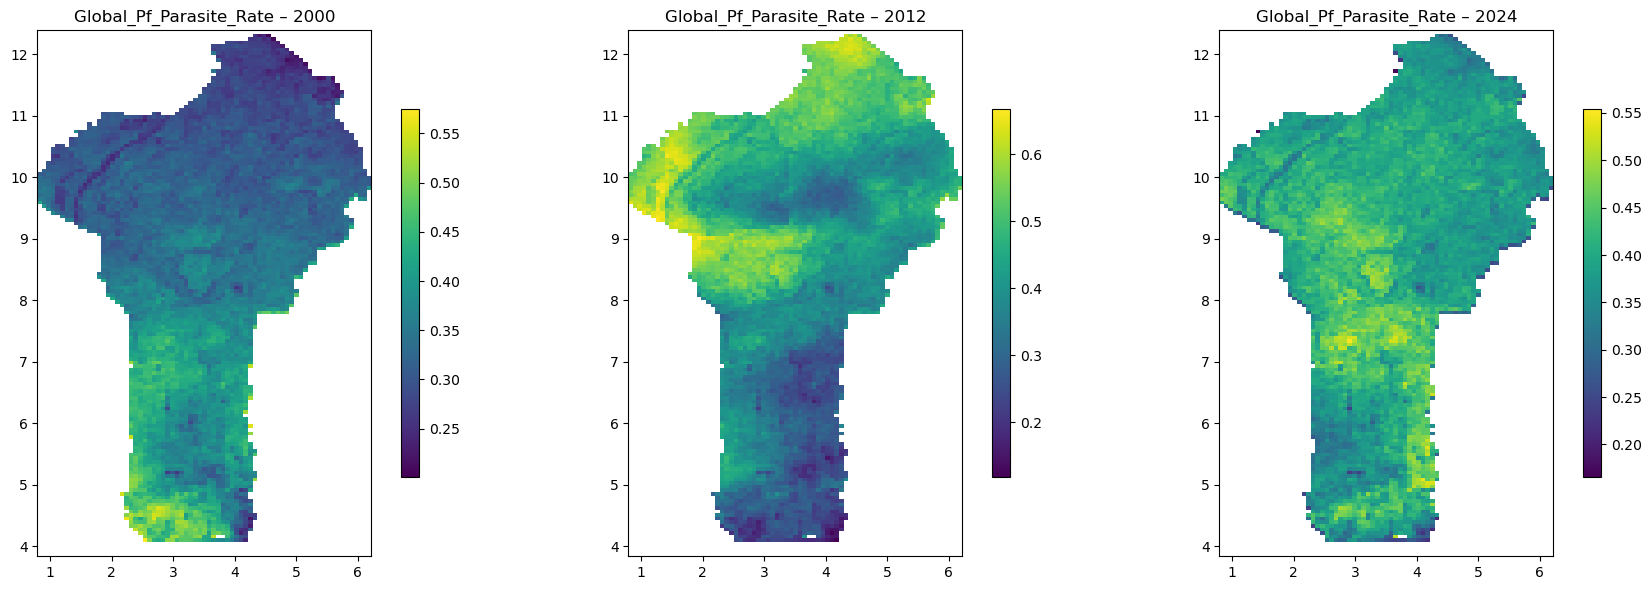

In [269]:
def load_malaria_year(year):
    for fname in malaria_files:
        if str(year) in fname:
            path = os.path.join(malaria_dir, fname)
            with rasterio.open(path) as src:
                data = src.read(1).astype(float)
                data = np.where(data == src.nodata, np.nan, data)
                bounds = src.bounds
            return data, bounds
    raise FileNotFoundError(f"Aucun fichier pour {year}")

years_to_plot = [2000, 2012, 2024]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, y in zip(axes, years_to_plot):
    data, bounds = load_malaria_year(y)
    img = ax.imshow(data, extent=bounds, origin="upper")
    ax.set_title(f"Global_Pf_Parasite_Rate – {y}")
    plt.colorbar(img, ax=ax, shrink=0.7)

plt.tight_layout()
plt.savefig("outputs/Comparaison_Global_Pf_Parasite_Rate_2000_2012_2024_benin.png", dpi=300, bbox_inches='tight')
plt.show()

Entre 2000 et 2012, on observe une augmentation notable du taux de prévalence du paludisme dans plusieurs régions du Bénin, particulièrement dans le Nord où les valeurs deviennent plus élevées. Après 2012, la prévalence diminue progressivement jusqu’en 2024, mais reste spatialement hétérogène. Les zones méridionales montrent une baisse plus marquée, probablement liée à une meilleure couverture sanitaire. La persistance de foyers plus intenses dans le Nord traduit des disparités géographiques structurelles. Globalement, la tendance va vers une amélioration, mais avec des poches de transmission toujours actives.